# Para inicializarmos a análise, nós precisamos compreender nossa base de dados e quais informações ela pode nos trazer

## 1. Importação das bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2. Abertura do arquivo e análize das informações apresentadas

In [2]:
dataset = pd.ExcelFile('Base - Case I.xlsx')
base_vendas = pd.read_excel(dataset, 'Base de Vendas')
base_vendas.head()

,Unnamed: 0,Código de venda,Produtos,Preço,Desconto/ Cupom,Preço final,Idade,Altura,Peso,Gênero,Região,Estado Civíl,Como conheceu a marca?,Recomendação médica?,Pessoa ativa?,Online ou Presencial?,Aspectos de e-commerce
0,NaN,156,Whey Protein - Baunilha - 1,481.5,48.15,433.35,59,187,65,Masculino,Norte,Solteiro,Redes Sociais,Sim,Não,Presencial,Dicas de uso (horário)
1,NaN,157,Vitamina C - gummies - 180,78.9,7.89,71.01,18,148,92,Feminino,Sudeste,Casado,Redes Sociais,Sim,Não,Online,Inválido
2,NaN,158,"Whey Protein - Banana - 0,5 ; Whey Protein - C...",500.0,50.00,450.00,21,163,91,Feminino,Sudeste,Solteiro,Recomendação de família/ Amigos,Sim,Não,Presencial,Informação Nutricional
3,NaN,159,Vitamina C - gummies - 250,115.9,11.59,104.31,21,185,82,Feminino,Sul,NaN,Recomendação médica,Não,Não,Presencial,Dicas de uso (quantidade)
4,NaN,160,Spirulina - 120 ; Colágeno - 300 ; Vitamina C ...,436.8,43.68,393.12,38,179,128,Feminino,Nordeste,NaN,Recomendação de família/ Amigos,Não,Sim,Presencial,Dicas de uso (quantidade) ; Dicas de uso (horá...


In [3]:
base_vendas.shape

(5246, 17)

In [4]:
base_vendas.dtypes

Unnamed: 0                float64
Código de venda             int64
Produtos                   object
Preço                     float64
Desconto/ Cupom           float64
Preço final               float64
Idade                       int64
Altura                      int64
Peso                        int64
Gênero                     object
Região                     object
Estado Civíl               object
Como conheceu a marca?     object
Recomendação médica?       object
Pessoa ativa?              object
Online ou Presencial?      object
Aspectos de e-commerce     object
dtype: object

In [5]:
len(base_vendas.dtypes)

17

Ou seja nós temos uma base relativamente grande, tanto na quantidade de dados, cerca de 5000 registros de vendas, quanto no quesito das figures, pois temos 17 delas, sendo 1 variável de ID, 7 variáveis numéricas e 9 variáveis categóricas

# 3. Análise da integridade do código

In [6]:
base_vendas=base_vendas.drop(columns=['Unnamed: 0'])
base_vendas.isnull().sum()

Código de venda            0
Produtos                   0
Preço                      0
Desconto/ Cupom            0
Preço final                0
Idade                      0
Altura                     0
Peso                       0
Gênero                    57
Região                    77
Estado Civíl              26
Como conheceu a marca?     0
Recomendação médica?       0
Pessoa ativa?              4
Online ou Presencial?      0
Aspectos de e-commerce     0
dtype: int64

In [7]:
base_vendas.fillna('Vazio', inplace = True)
base_vendas.isnull().sum()

Código de venda           0
Produtos                  0
Preço                     0
Desconto/ Cupom           0
Preço final               0
Idade                     0
Altura                    0
Peso                      0
Gênero                    0
Região                    0
Estado Civíl              0
Como conheceu a marca?    0
Recomendação médica?      0
Pessoa ativa?             0
Online ou Presencial?     0
Aspectos de e-commerce    0
dtype: int64

Para evitar futuros problemas com a base, nós adicionaremos a paralvra "Vazio" em todas as lacunas que não possuem informação

# 4. Análize explorátoria

### Nesse primeiro momento é extremamente importante entender a logística da empresa

Para isso começaremos analizando a a venda de cada produto da "nome empresa"

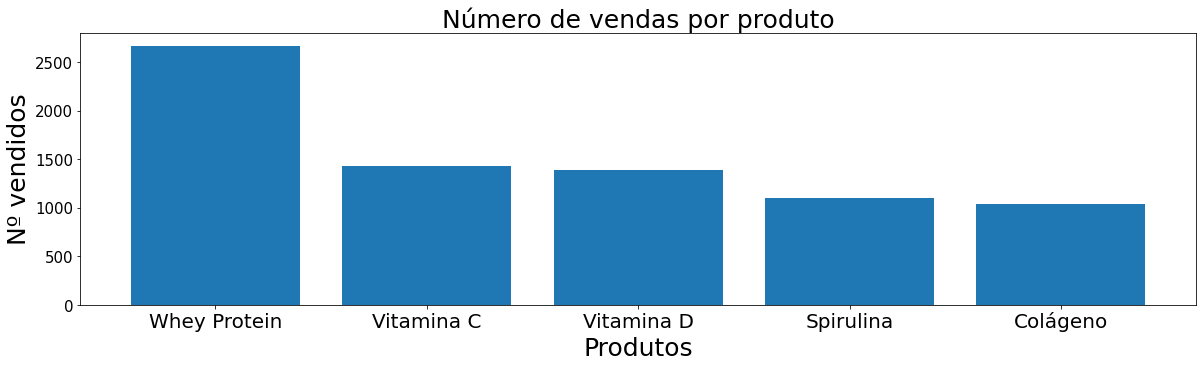

In [8]:
produtos_agr = ['Whey Protein', 'Vitamina C', 'Vitamina D', 'Spirulina', 'Colágeno']

prod_total=[]
for i in range(len(produtos_agr)):
    lista_prod_total = base_vendas['Produtos '].tolist()
    prod_total.append(''.join(lista_prod_total).count(produtos_agr[i]))

plt.figure(figsize=(20,5))
plt.bar(produtos_agr, prod_total)
plt.title('Número de vendas por produto', fontsize = 25)
plt.xlabel('Produtos', fontsize=25)
plt.ylabel('Nº vendidos', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.show()

Com esse gráfico conseguimos visualizar o quanto a venda de Whey é importante para a "nome empresa", pois é seu principal produto em questão de número de vendas. Porém ainda não conseguimos traçar exatamente muita informação apenas desse gráfico, por isso nós mapeamos essas vendas por região.

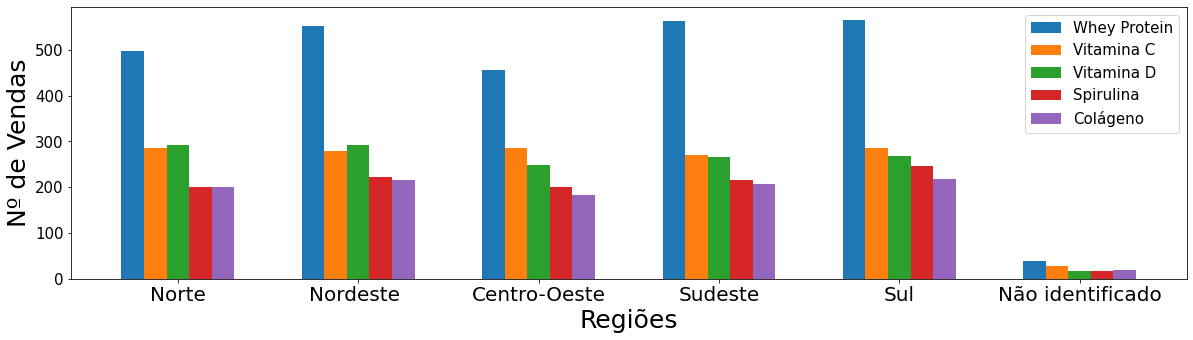

In [9]:
regioes = ['Norte', 'Nordeste ', 'Centro-Oeste' ,'Sudeste', 'Sul', 'Vazio',]

prod_reg_agr=[]

for i in range(len(produtos_agr)):
    
    prod_reg=[]
    
    for j in range(len(regioes)):
        vendas_regiao = base_vendas.loc[base_vendas['Região'] == regioes[j]]
        lista_prod = vendas_regiao['Produtos '].tolist()
        
        prod_reg.append(''.join(lista_prod).count(produtos_agr[i]))
    prod_reg_agr.append(prod_reg)
    
width = 0.125
plt.figure(figsize=(20,5))

r1 = np.arange(len(regioes))-0.1875
r2 = [x+width for x in r1]
r3 = [x+width for x in r2]
r4 = [x+width for x in r3]
r5 = [x+width for x in r4]

R = [r1, r2, r3, r4, r5]

for i in range(len(R)):
    plt.bar(R[i], prod_reg_agr[i], width=width, label = produtos_agr[i])
plt.xlabel('Regiões', fontsize=25)
plt.xticks([x+width/2 for x in range(6)],['Norte', 'Nordeste ', 'Centro-Oeste', 'Sudeste', 'Sul', 'Não identificado'], fontsize=20)
plt.ylabel('Nº de Vendas', fontsize=25)
plt.yticks(fontsize = 15)
plt.legend(fontsize=15)
plt.show()

Com isso, torna-se claro que a "nome empresa" é uma marca que além de estar em todas as regiões, possue resultados relativamente parecidos em todos eles, por conta disso nós decidimos analizar o cliente própriamente dito

<function matplotlib.pyplot.show(close=None, block=None)>

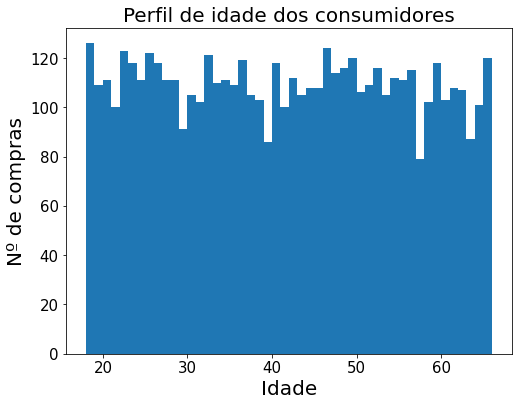

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(base_vendas['Idade '], bins=range(18, 67,1))
plt.title('Perfil de idade dos consumidores', fontsize = 20)
plt.xlabel('Idade', fontsize = 20)
plt.ylabel('Nº de compras', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show

Nessa primeira análize é notavel a tambem que o nosso consumidor vai desde os jovens até o público idoso, novamente temos uma organização relativamente uniforme

48


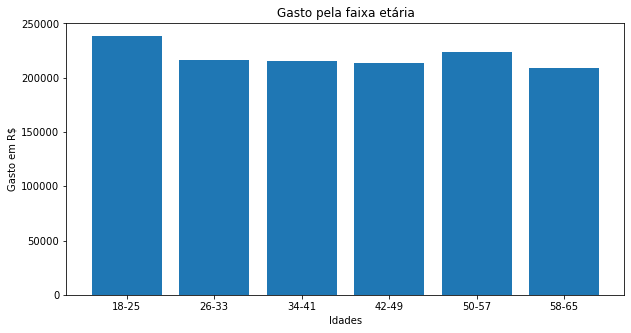

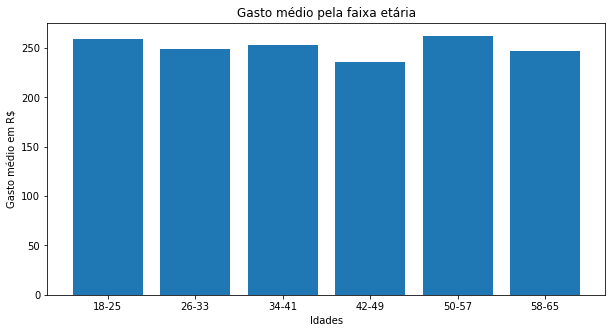

In [11]:
idade = base_vendas['Idade '].unique()
idade.sort()
gasto = []
gasto_faixas = [0,0,0,0,0,0]
faixas = ['18-25', '26-33', '34-41', '42-49', '50-57', '58-65']

for i in range(len(idade)):
    gasto.append(round(base_vendas.loc[base_vendas['Idade '] == idade[i]]['Preço final '].sum(), 4))
    if idade[i] < 26:
        gasto_faixas[0] += gasto[i-1]
    elif idade[i] < 34:
        gasto_faixas[1] += gasto[i-1]
    elif idade[i] < 42:
        gasto_faixas[2] += gasto[i-1]
    elif idade[i] < 50:
        gasto_faixas[3] += gasto[i-1]
    elif idade[i] < 58:
        gasto_faixas[4] += gasto[i-1]
    else:
        gasto_faixas[5] += gasto[i-1]

plt.figure(figsize=(10,5))
plt.bar(faixas, gasto_faixas)
plt.ylabel("Gasto em R$")
plt.xlabel("Idades")
plt.title('Gasto pela faixa etária')

gasto_faixas2 = []
pessoas_faixa = [0,0,0,0,0,0]
for i in range(len(idade)):

    variavel = list(base_vendas['Idade ']).count(idade[i])
    if idade[i] < 26:
        pessoas_faixa[0] += variavel
    elif idade[i] < 34:
        pessoas_faixa[1] += variavel
    elif idade[i] < 42:
        pessoas_faixa[2] += variavel
    elif idade[i] < 50:
        pessoas_faixa[3] += variavel
    elif idade[i] < 58:
        pessoas_faixa[4] += variavel
    else:
        pessoas_faixa[5] += variavel

for i in range(len(faixas)):
    gasto_faixas2.append(round(gasto_faixas[i]/pessoas_faixa[i],4))      
plt.figure(figsize=(10,5))
plt.bar(faixas, gasto_faixas2)
plt.ylabel("Gasto médio em R$")
plt.xlabel("Idades")
plt.title('Gasto médio pela faixa etária')
plt.show

print(len(idade))

Com o intuito de diferenciar os nossos clientes, busquei avfulilá-los de acordo com o seu gasto, considerando primeiro o gasto total de cada faixa etária e após o gasto médio. Nas 2 análises vemos que novamente os consumidores tem comportamentos parecidos independente das varíaveis, agora em relação a idade, pois esses gráficos mostram que seu gasto é muito parecido

<function matplotlib.pyplot.show(close=None, block=None)>

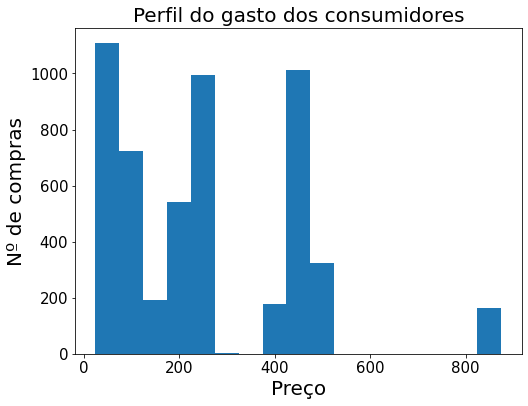

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(base_vendas['Preço final '], bins=range(25, 900, 50))
plt.title('Perfil do gasto dos consumidores', fontsize = 20)
plt.xlabel('Preço', fontsize = 20)
plt.ylabel('Nº de compras', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show

Após concluir que a idade não tem grande influência sobre o gasto que um cliente teria comprando na "nome empresa", pensamos em tentar visualizar como o custo total das compras poderia nos mostrar alguma segmentação, coisa que se realizou pois o gráfico apresente uma visível divisão em 3 segmentos, porém ainda precisamos entender o que caracterizaria esses nichos, por isso partimos para uma análise que envolva o genero do consumidor, já que isto ainda não foi analizado.

In [13]:
base_homens = base_vendas.loc[base_vendas['Gênero '] == 'Masculino']
base_mulheres = base_vendas.loc[base_vendas['Gênero '] == 'Feminino ']
base_nao_id = base_vendas.loc[base_vendas['Gênero '] == 'Vazio']

homens = []
mulheres = []
nao_id = []

for i in range(len(regioes)):
    homens.append(len(base_homens.loc[base_homens['Região'] == regioes[i]]))
    mulheres.append(len(base_mulheres.loc[base_mulheres['Região'] == regioes[i]]))
    nao_id.append(len(base_nao_id.loc[base_nao_id['Região'] == regioes[i]]))

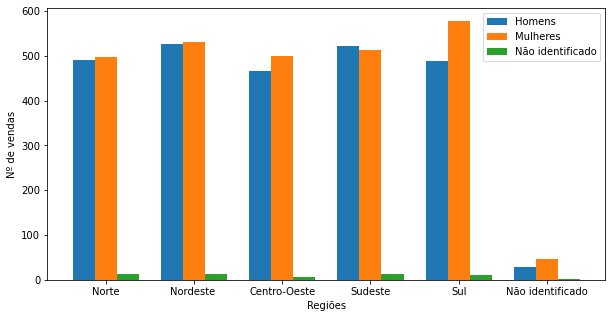

In [14]:
width = 0.25
plt.figure(figsize=(10,5))

r1 = np.arange(len(homens))
r2 = [x+width for x in r1]
r3 = [x+width for x in r2]

plt.bar(r1, homens, width=width, label = "Homens")
plt.bar(r2, mulheres, width=width, label = "Mulheres")
plt.bar(r3, nao_id, width=width, label = "Não identificado")

plt.xlabel('Regiões')
plt.xticks([x+width for x in range(6)],['Norte', 'Nordeste ', 'Centro-Oeste', 'Sudeste', 'Sul', 'Não identificado'])
plt.ylabel('Nº de vendas')
plt.legend()
plt.show()

Para entender a influência do genero do consumidor em relação ao consumo dos nossos produtos, precisamos começar os comparando em relação ao número de vendas, neste caso nós aproveitamos para comparar a distribuição de compras realizadas por homens e mulheres em cada região ao mesmo tempo.

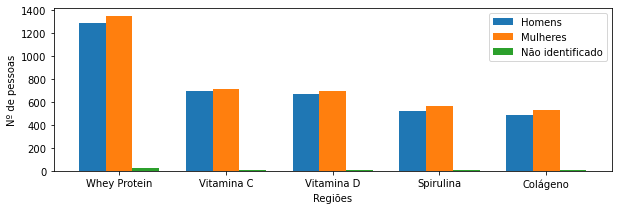

In [15]:
prod_homens=[]
prod_mulheres=[]
prod_nao_id=[]

lista_prod_homens = base_homens['Produtos '].tolist()
lista_prod_mulheres = base_mulheres['Produtos '].tolist()
lista_prod_nao_id= base_nao_id['Produtos '].tolist()

for i in range(len(produtos_agr)):
    prod_homens.append(''.join(lista_prod_homens).count(produtos_agr[i]))
    prod_mulheres.append(''.join(lista_prod_mulheres).count(produtos_agr[i]))
    prod_nao_id.append(''.join(lista_prod_nao_id).count(produtos_agr[i]))

width = 0.25
plt.figure(figsize=(10,3))

r1 = np.arange(len(produtos_agr))
r2 = [x+width for x in r1]
r3 = [x+width for x in r2]

plt.bar(r1, prod_homens, width=width, label = "Homens")
plt.bar(r2, prod_mulheres, width=width, label = "Mulheres")
plt.bar(r3, prod_nao_id, width=width, label = "Não identificado")

plt.xlabel('Regiões')
plt.xticks([x+width for x in range(5)],produtos_agr)
plt.ylabel('Nº de pessoas')
plt.legend()
plt.show()

Por conta dessa particuliaridade, nós decidimos nos aprofundar nas análises que envolvem os gêneros, afim de entender se os padrões e intereses são similares ou não. Para isso precisamos ter um panorama do que cada gênero mais consome e seus gastos em nossa loja.

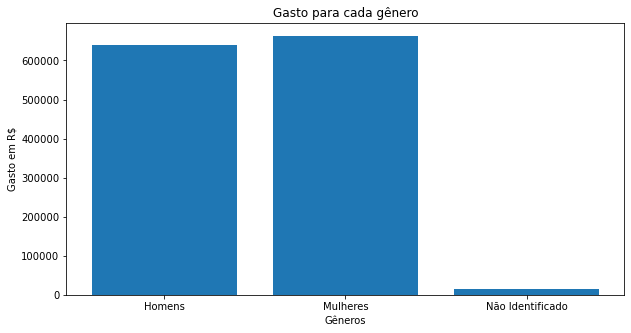

In [16]:
base_homens['Preço final ']
base_mulheres['Preço final ']
base_nao_id['Preço final ']

genero = ['Homens', 'Mulheres', 'Não Identificado']

gasto_faixas_genero = [sum(base_homens['Preço final ']),sum(base_mulheres['Preço final ']),sum(base_nao_id['Preço final '])]

plt.figure(figsize=(10,5))
plt.bar(genero, gasto_faixas_genero)
plt.ylabel("Gasto em R$")
plt.xlabel("Gêneros")
plt.title('Gasto para cada gênero')
plt.show()

Nesse momento, nós tivemos um insight e começamos a nos perguntar como a empresa fazia para conseguir um público tão uniforme em todos os ambitos.

[15.535646206633626, 16.18375905451773, 17.022493328250096, 16.66031261913839, 17.365611894776972, 17.232176896683185]


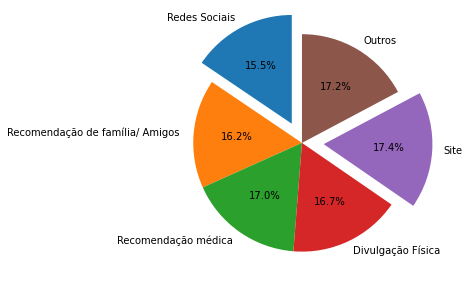

In [17]:
porcent_market = []
cat_market = base_vendas['Como conheceu a marca?'].unique()
for i in range(len(cat_market)):
    base_marketing = base_vendas.loc[base_vendas['Como conheceu a marca?'] == cat_market[i]]
    porcent_market.append((base_marketing.shape[0]*100)/base_vendas.shape[0])
print(porcent_market)
explode = [0.2,0,0,0,0.2,0]

fig = plt.figure(figsize =(5, 5)) 
plt.pie(porcent_market, labels = cat_market, explode = explode, startangle = 90, autopct='%1.1f%%') 
plt.show() 

In [18]:
boleana = ['Sim', 'Não']
cat_forma = ['Online', 'Presencial']
onli_med = []
forma_compra=[]
for i in range(2):
    for u in range(2):
        forma_compra.append(base_vendas.loc[(base_vendas['Recomendação médica?'] == boleana[u]) & (base_vendas['Online ou Presencial?'] == cat_forma[i])].shape[0])
    onli_med.append(forma_compra)
    forma_compra = []
    print(onli_med)

[[1269, 1307]]
[[1269, 1307], [1316, 1354]]


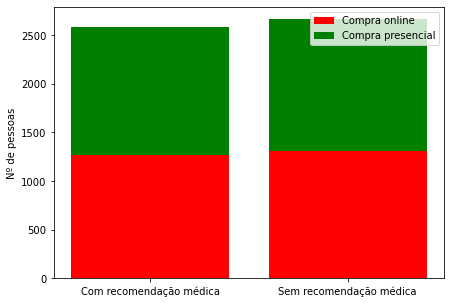

In [19]:
legenda_rec = ['Compra online', 'Compra presencial']
rec_med = ['Com recomendação médica', 'Sem recomendação médica']

plt.figure(figsize=(7, 5))

plt.bar(rec_med, onli_med[0], color = 'red')
plt.bar(rec_med, onli_med[1], color = 'green', bottom = onli_med[0])
plt.ylabel('Nº de pessoas')
plt.legend(legenda_rec)
plt.show()

Nós chegamos a esses 2 graficos, que assim como os outros nos trouxe valores parecidos na 2 situações, porém há algo iunteresante sobre o primeiro gráfico, pois, ele demostra a efetividades das estratégias de marketing aplicadas a empresa, demostrando que técnicas rudmentares como a divulgação física e recomendação por familiar, que em tese tem uma eficiencia menor, trouxe resultados similares a estratégias mais atuais como o site e as redes sociais. Ou seja, ele nos mostra que existe um problema de execução na aplicação dessas estratégias.

Além do 2º gráfico que nos demonstra que as vendas com recomendação médica se iguala as que não apresentam tal recomendação, mas também que as diferentes formas de venda geram a mesma quantidade de vendas.

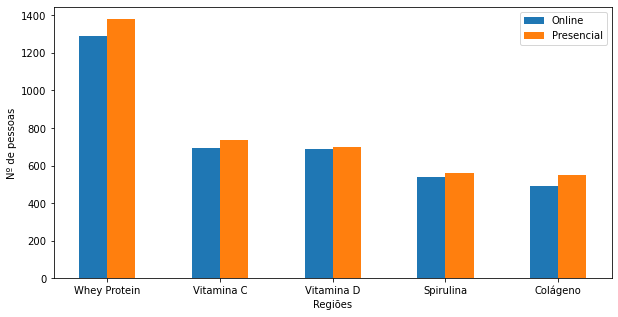

In [20]:
prod_online = []
prod_presencial = []

base_online = base_vendas.loc[base_vendas['Online ou Presencial?'] == 'Online']
base_presen = base_vendas.loc[base_vendas['Online ou Presencial?'] == 'Presencial']

lista_prod_online = base_online['Produtos '].tolist()
lista_prod_presencial = base_presen['Produtos '].tolist()

for i in range(len(produtos_agr)):
    prod_online.append(''.join(lista_prod_online).count(produtos_agr[i]))
    prod_presencial.append(''.join(lista_prod_presencial).count(produtos_agr[i]))

width = 0.25
plt.figure(figsize=(10,5))

r1 = np.arange(len(produtos_agr))+0.25/2
r2 = [x+width for x in r1]

plt.bar(r1, prod_online, width=width, label = "Online")
plt.bar(r2, prod_presencial, width=width, label = "Presencial")

plt.xlabel('Regiões')
plt.xticks([x+width for x in range(5)],produtos_agr)
plt.ylabel('Nº de pessoas')
plt.legend()
plt.show()

In [21]:
produtos = list(base_vendas['Produtos '])
i=0
while i < len(produtos):
    if ' ; ' in produtos[i]:
        produtos.extend(produtos[i].split(' ; '))
        del produtos[i]
    else:
        i += 1
produtos_type = np.unique(produtos)
produtos_type

array(['Colágeno - 150', 'Colágeno - 300', 'Spirulina - 120',
       'Spirulina - 240', 'Spirulina - 60', 'Vitamina C - cápsulas - 120',
       'Vitamina C - cápsulas - 30', 'Vitamina C - gummies - 180',
       'Vitamina C - gummies - 250', 'Vitamina D 10000iu- cápsulas - 120',
       'Vitamina D 10000iu- cápsulas - 60',
       'Vitamina D 1000iu- cápsulas - 120',
       'Vitamina D 1000iu- cápsulas - 60',
       'Vitamina D 1000iu- cápsulas -120', 'Whey Protein - Banana - 0,5',
       'Whey Protein - Banana - 1', 'Whey Protein - Baunilha - 0,5',
       'Whey Protein - Baunilha - 1', 'Whey Protein - Chocolate - 0,5',
       'Whey Protein - Chocolate - 1',
       "Whey Protein - Cookies n' Cream - 0,5",
       "Whey Protein - Cookies n' Cream - 1"], dtype='<U37')

In [22]:
qtd = []
dicio = {}
for i in range(len(produtos_type)):
    qtd.append(produtos.count(produtos_type[i]))
    dicio[produtos_type[i]] = qtd[i]
qtd.sort()

<function matplotlib.pyplot.show(close=None, block=None)>

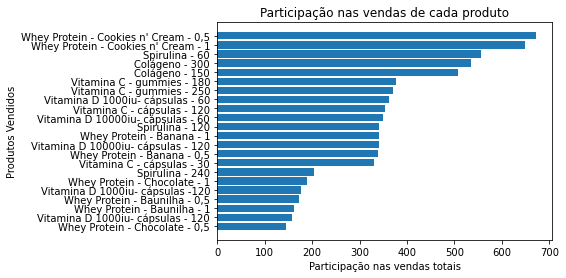

In [23]:
plt.barh((sorted(dicio, key = dicio.get)), qtd)
plt.ylabel("Produtos Vendidos")
plt.xlabel("Participação nas vendas totais")
plt.title('Participação nas vendas de cada produto')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

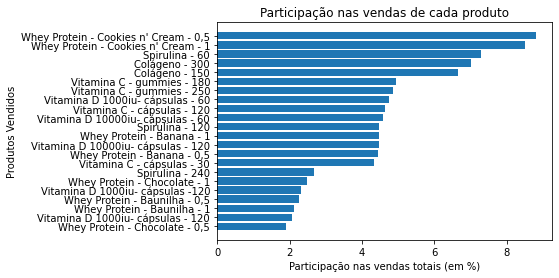

In [24]:
new_qtd = [(100*x) / len(produtos) for x in qtd]
plt.barh((sorted(dicio, key = dicio.get)), new_qtd)
plt.ylabel("Produtos Vendidos")
plt.xlabel("Participação nas vendas totais (em %)")
plt.title('Participação nas vendas de cada produto')
plt.show

gasto pela idade

gasto medio pela idade

Forma de compra por região

In [25]:
base_online = base_vendas.loc[base_vendas['Online ou Presencial?'] == 'Online']
base_presenc = base_vendas.loc[base_vendas['Online ou Presencial?'] == 'Presencial']

online_reg = []
presenc_reg = []

for i in range(len(regioes)):
    online_reg.append(len(base_online.loc[base_online['Região'] == regioes[i]]))
    presenc_reg.append(len(base_presenc.loc[base_presenc['Região'] == regioes[i]]))

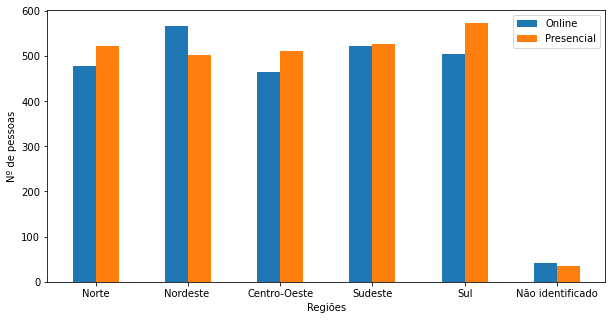

In [26]:
width = 0.25
plt.figure(figsize=(10,5))

r1 = np.arange(len(online_reg))
r2 = [x+width for x in r1]

plt.bar(r1, online_reg, width=width, label = "Online")
plt.bar(r2, presenc_reg, width=width, label = "Presencial")

plt.xlabel('Regiões')
plt.xticks([x+width/2 for x in range(6)],['Norte', 'Nordeste ', 'Centro-Oeste', 'Sudeste', 'Sul', 'Não identificado'])
plt.ylabel('Nº de pessoas')
plt.legend()
plt.show()

Produtos por região

In [27]:
base_homens['Região'].unique()

array(['Norte', 'Nordeste ', 'Vazio', 'Sudeste', 'Sul', 'Centro-Oeste'],
      dtype=object)

In [28]:
import sweetviz as sv

In [29]:
marketing_report = sv.analyze(base_vendas)
marketing_report.show_html('marketing_report.html')


Report marketing_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
